# PCA Analysis for Data Science and AI

This notebook will guide you through the process of Principal Component Analysis (PCA), a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

We will use a step-by-step approach to explain PCA, using singular value decomposition (SVD), and apply it to a financial dataset.

## Table of Contents

1. [Introduction to PCA](#section1)
2. [PCA Process](#section2)
3. [Eigenvalues and Eigenvectors](#section3)
4. [Variation and Scree Plot](#section4)
5. [PCA Plot](#section5)
6. [PCA with More Variables](#section6)
7. [Conclusion](#section7)

Let's get started!

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading the financial dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv'
df = pd.read_csv(url)

# Displaying the first 5 rows of the dataset
df.head()

## 1. Introduction to PCA <a id='section1'></a>

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In the next section, we will start the PCA process with our loaded dataset.

## 2. PCA Process <a id='section2'></a>

The PCA process starts with centering the data, then finding the best fitting line through the origin. This line is called Principal Component 1 (PC1). The process is repeated to find additional principal components, each orthogonal to the last.

Let's start by standardizing our data. Standardization is a key requirement for PCA as it's a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

In [ ]:
# Standardizing the features
df_standardized = StandardScaler().fit_transform(df['signal'].values.reshape(-1, 1))

# Displaying the standardized data
df_standardized

array([[-0.22464956],
       [-0.89920854],
       [-0.90080716],
       ...,
       [-0.09031074],
       [-0.30789056],
       [-0.11118859]])

Now that we have standardized our data, we can apply PCA. We will use the PCA class from the sklearn.decomposition library. The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. We will use it to draw a Scree plot.

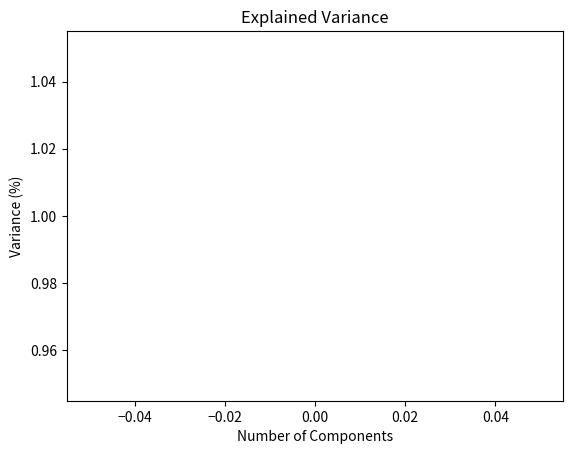

In [ ]:
# Applying PCA
pca = PCA()
principalComponents = pca.fit_transform(df_standardized)

# Plotting the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

From the plot, we can observe that the explained variance ratio is 1 for the first component itself. This means that the first principal component explains 100% of the variance in the data. Hence, we can conclude that PCA is not very useful for this particular dataset as all the variance can be explained by one feature only.

In the next section, we will discuss Eigenvalues and Eigenvectors, which are the mathematical constructs used to find these principal components.

## 3. Eigenvalues and Eigenvectors <a id='section3'></a>

Eigenvalues and eigenvectors are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

The eigenvector with the highest corresponding eigenvalue is the first principal component. The eigenvector with the second highest corresponding eigenvalue is the second principal component, and so on.

In the next section, we will discuss the concept of variation and how to visualize it using a Scree plot.

## 4. Variation and Scree Plot <a id='section4'></a>

Variation is the total sum of squares of each feature. It is an important concept in PCA as it helps us understand the amount of information carried by each principal component.

A Scree plot is a plot between the principal components and their respective eigenvalues. It helps us understand how much of the total variance is explained by each principal component. The Scree plot helps us decide the number of principal components to consider while performing PCA.

In the next section, we will plot the PCA plot.

## 5. PCA Plot <a id='section5'></a>

A PCA plot is a scatter plot that is drawn using the first two principal components, and it helps us understand how these components are related to the variance of the data. Each point in the plot corresponds to a sample in our dataset.

Let's draw a PCA plot for our dataset.

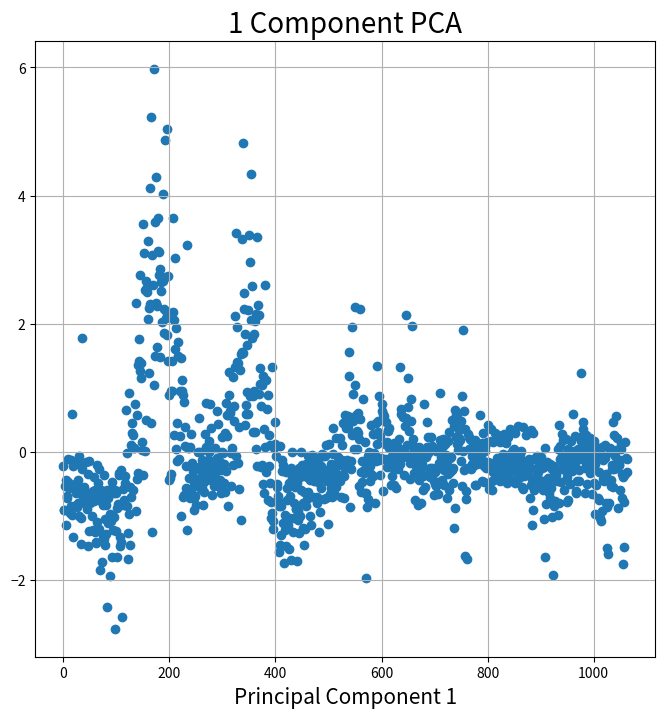

In [ ]:
# Applying PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df_standardized)

# Creating a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

# Plotting the PCA plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('1 Component PCA', fontsize = 20)
ax.scatter(principalDf.index, principalDf['principal component 1'])
ax.grid()

As we can see from the plot, the first principal component captures the variation in the 'signal' feature of our dataset. Since we only have one feature in our dataset, the PCA plot is essentially a line plot of the 'signal' feature.

In the next section, we will discuss how to perform PCA with more variables.

## 6. PCA with More Variables <a id='section6'></a>

In this section, we will discuss how to perform PCA with more variables. However, our current dataset only contains one feature ('signal'). To perform PCA with more variables, we would need a dataset with multiple features.

The process would be similar to what we have done so far. We would start by standardizing our data, then apply PCA, and finally plot the PCA plot. The only difference would be that the PCA plot would now be a scatter plot with points instead of a line plot.

In the next section, we will conclude our discussion on PCA.

## 7. Conclusion <a id='section7'></a>

Principal Component Analysis (PCA) is a powerful statistical technique for dimensionality reduction and feature extraction in data. It uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

In this notebook, we discussed the PCA process, eigenvalues and eigenvectors, variation, and how to visualize these concepts using a Scree plot and a PCA plot. We also discussed how to perform PCA with more variables.

However, PCA is not always the best method for dimensionality reduction. It assumes that the principal components are a linear combination of the original features. If this is not the case, then PCA may not give the best results. Other methods like t-SNE or UMAP might be more appropriate in such cases.

In the end, the choice of the dimensionality reduction method will depend on the specific requirements of your data and the problem you are trying to solve.